In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
from lmfit.models import ExponentialModel, GaussianModel

data10keV = pd.read_csv('data10keV.csv')
data30keV = pd.read_csv('data30keV.csv')
data50keV = pd.read_csv('data50keV.csv')
data70keV = pd.read_csv('data70keV.csv')
data90keV = pd.read_csv('data90keV.csv')

In [47]:
def plot3dVacancy(fit_x,fitcurve,thickness,lab):

    if lab == 0:
        # ax.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '^',  color = 'k', s = 5, )
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', linestyle = '--', lw = 1.3)
    else:
        # ax.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '.', label = 'Carbon Vacancy Distribution Data', color = 'k', s = 1)
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', linestyle = '--', label = 'Carbon Vacancy Distribution', lw = 1.3)
    
    obj = ax.fill_between(fit_x, 0, fitcurve, step='mid', alpha=0.1) 
    ax.add_collection3d(obj, zs = thickness, zdir = 'y')

In [48]:
def plot3dSilicon(DEPTH,data,thickness,lab):
    if lab == 0:
        ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = 'aqua')
    else:
        ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = 'aqua', label = 'Silicon Atom Distribution')

No handles with labels found to put in legend.


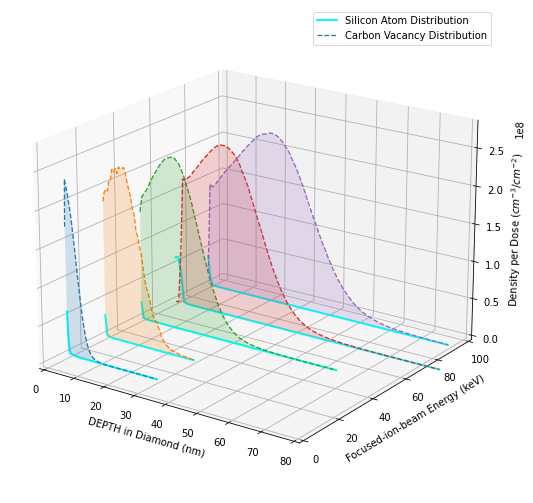

In [49]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
plt.grid()

ax.legend()
ax.set_xlim(0, 80)
ax.set_ylim(0, 100)
ax.set_zlim(0, 2.8e8)
ax.set_xlabel('DEPTH in Diamond (nm)')
ax.set_ylabel('Focused-ion-beam Energy (keV)')
ax.set_zlabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')

plot3dSilicon(data10keV['DEPTH'],data10keV['Si'], 10,1)
plot3dSilicon(data30keV['DEPTH'],data30keV['Si'], 30,0)
plot3dSilicon(data50keV['DEPTH'],data50keV['Si'],50,0)
plot3dSilicon(data70keV['DEPTH'],data70keV['Si'], 70,0)
plot3dSilicon(data90keV['DEPTH'],data90keV['Si'], 90,0)


plot3dVacancy(data10keV['DEPTH'],data10keV['C']*1e8, 10,1)
plot3dVacancy(data30keV['DEPTH'],data30keV['C']*1e8, 30,0)
plot3dVacancy(data50keV['DEPTH'],data50keV['C']*1e8,50,0)
plot3dVacancy(data70keV['DEPTH'],data70keV['C']*1e8, 70,0)
plot3dVacancy(data90keV['DEPTH'],data90keV['C']*1e8, 90,0)


ax.view_init(elev=20., azim=-55)

ax.legend()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 82
    # data points      = 85
    # variables        = 3
    chi-square         = 0.00986158
    reduced chi-square = 1.2026e-04
    Akaike info crit   = -764.249614
    Bayesian info crit = -756.921660
    R-squared          = 0.99969804
[[Variables]]
    amplitude:  16.9155737 +/- 0.16323793 (0.97%) (init = 2e+08)
    center:     0.51643572 +/- 0.03345132 (6.48%) (init = 0)
    sigma:      2.99380253 +/- 0.02056252 (0.69%) (init = 7.5)
    fwhm:       7.04986607 +/- 0.04842103 (0.69%) == '2.3548200*sigma'
    height:     2.25410254 +/- 0.00826798 (0.37%) == '0.3989423*amplitude/max(1e-15, sigma)'


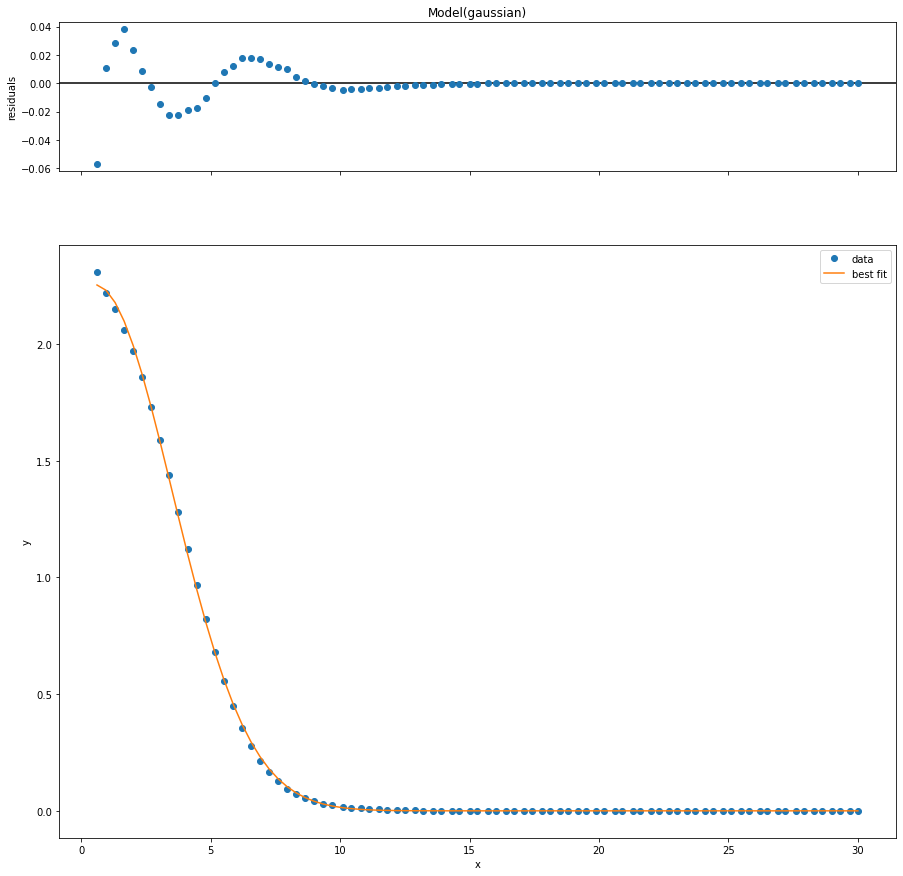

In [50]:
model1 = GaussianModel() 
model = model1
params = model.make_params()
params['amplitude'].set(value = 2e8, vary=True)
params['center'].set(value = 0, vary=True)
params['sigma'].set(value = 7.5, vary=True)
    
model_fit = model.fit(data10keV['C'][1:], params, x=data10keV['DEPTH'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 55
    # variables        = 3
    chi-square         = 0.12209635
    reduced chi-square = 0.00234801
    Akaike info crit   = -330.065290
    Bayesian info crit = -324.043290
    R-squared          = 0.99737314
[[Variables]]
    amplitude:  37.7324717 +/- 0.35384284 (0.94%) (init = 2e+08)
    center:     5.64636768 +/- 0.06757481 (1.20%) (init = 0)
    sigma:      6.38845585 +/- 0.06987808 (1.09%) (init = 7.5)
    fwhm:       15.0436636 +/- 0.16455031 (1.09%) == '2.3548200*sigma'
    height:     2.35629382 +/- 0.01369754 (0.58%) == '0.3989423*amplitude/max(1e-15, sigma)'


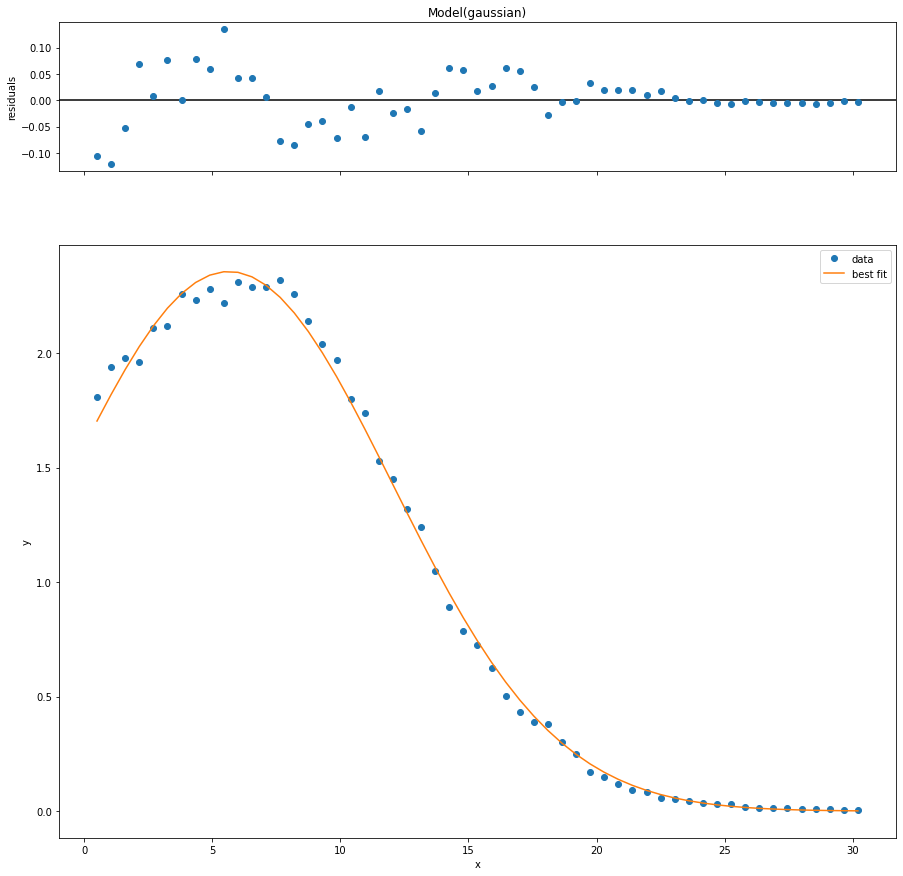

In [51]:
model_fit = model.fit(data30keV['C'], params, x=data30keV['DEPTH'])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 89
    # variables        = 3
    chi-square         = 0.07817471
    reduced chi-square = 9.0901e-04
    Akaike info crit   = -620.332649
    Bayesian info crit = -612.866740
    R-squared          = 0.99887542
[[Variables]]
    amplitude:  53.5312616 +/- 0.30081835 (0.56%) (init = 2e+08)
    center:     10.7160378 +/- 0.05808394 (0.54%) (init = 0)
    sigma:      9.15431977 +/- 0.05979320 (0.65%) (init = 7.5)
    fwhm:       21.5567753 +/- 0.14080223 (0.65%) == '2.3548200*sigma'
    height:     2.33287510 +/- 0.00803221 (0.34%) == '0.3989423*amplitude/max(1e-15, sigma)'


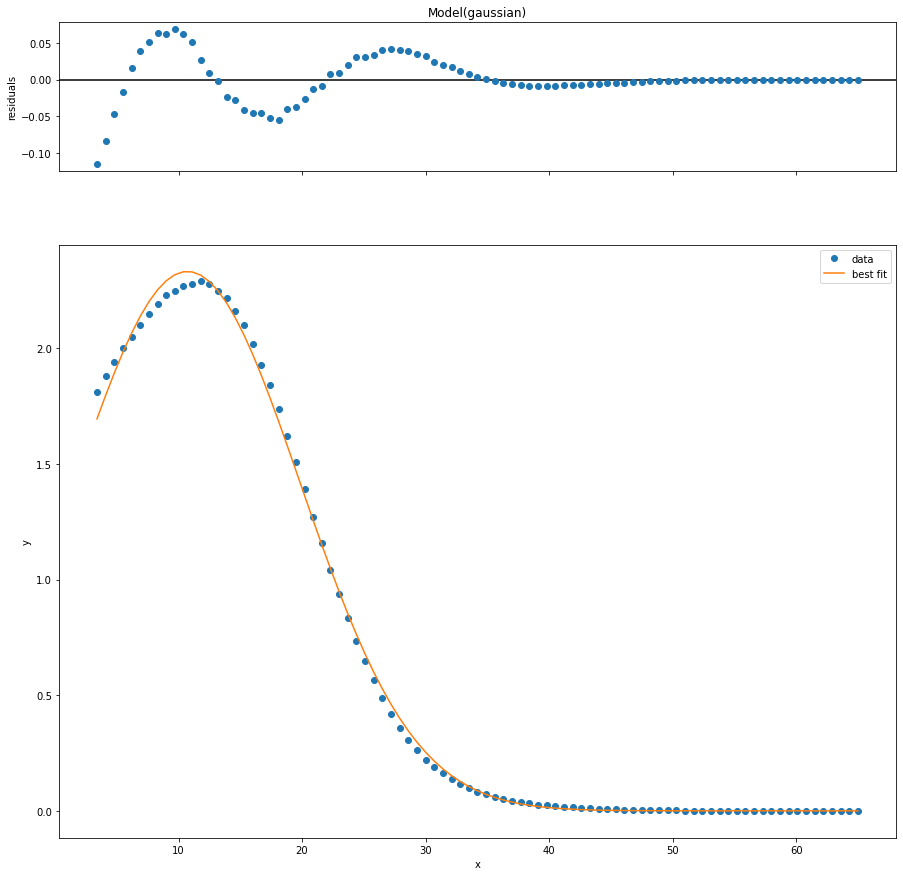

In [52]:
model_fit = model.fit(data50keV['C'][4:], params, x=data50keV['DEPTH'][4:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 80
    # data points      = 91
    # variables        = 3
    chi-square         = 0.20309489
    reduced chi-square = 0.00230790
    Akaike info crit   = -549.549675
    Bayesian info crit = -542.017097
    R-squared          = 0.99719372
[[Variables]]
    amplitude:  72.3465764 +/- 0.55898567 (0.77%) (init = 2e+08)
    center:     15.7729475 +/- 0.10653111 (0.68%) (init = 0)
    sigma:      12.3452411 +/- 0.11485025 (0.93%) (init = 7.5)
    fwhm:       29.0708207 +/- 0.27045166 (0.93%) == '2.3548200*sigma'
    height:     2.33791380 +/- 0.01263260 (0.54%) == '0.3989423*amplitude/max(1e-15, sigma)'


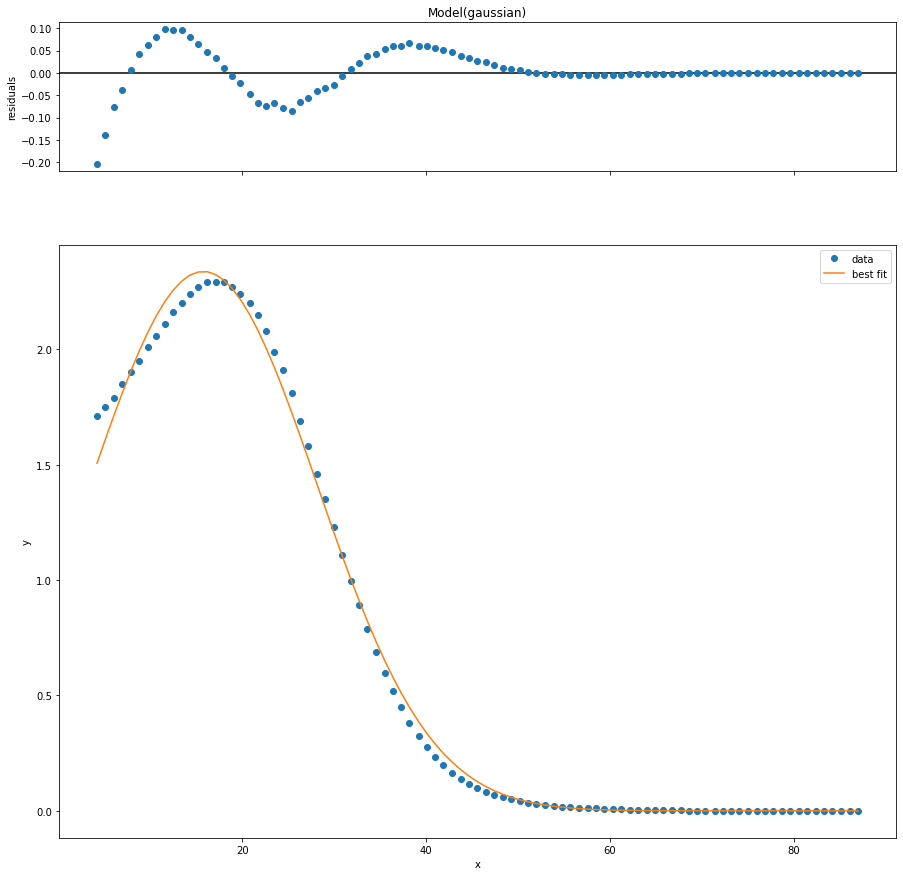

In [53]:
model_fit = model.fit(data70keV['C'][4:], params, x=data70keV['DEPTH'][4:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 93
    # variables        = 3
    chi-square         = 0.41534715
    reduced chi-square = 0.00461497
    Akaike info crit   = -497.245328
    Bayesian info crit = -489.647530
    R-squared          = 0.99438849
[[Variables]]
    amplitude:  87.9513363 +/- 0.71583062 (0.81%) (init = 2e+08)
    center:     19.4462753 +/- 0.13598573 (0.70%) (init = 0)
    sigma:      15.0838129 +/- 0.15171582 (1.01%) (init = 7.5)
    fwhm:       35.5196644 +/- 0.35726344 (1.01%) == '2.3548200*sigma'
    height:     2.32616968 +/- 0.01547418 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'


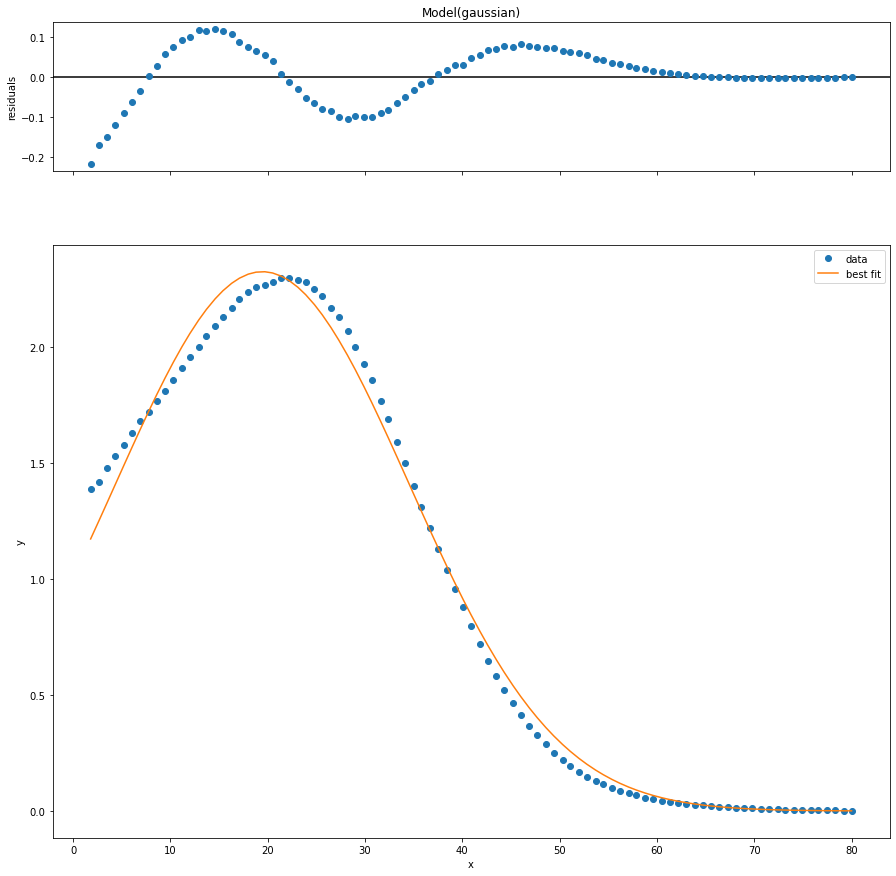

In [54]:
model_fit = model.fit(data90keV['C'][2:], params, x=data90keV['DEPTH'][2:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);